### Trial 2: Estimate Network Jitter

Use end-to-end latency from various machines to estimate the latency and variations in the latency.

- Machine A: 30 km from server
- Machine B: 1000 km from server
- Machine C: 10000 km from server (Stanford Myth63)
- Machine D: 12000 km from server

In [1]:
import math

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

RACE_WINDOW_MU = 1.5597
RACE_WINDOW_SIGMA = 1.4183

# Function to read jitter values from the file
def collect_jitter_values(file_path):
    jitter_values = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            try:
                # Assuming each line is in the format: index: jitter_value
                _, jitter_str = line.split(': ')
                jitter_value = float(jitter_str.strip())
                jitter_values.append(jitter_value)
            except ValueError:
                # Skip lines that do not match the expected format
                continue
    return jitter_values

# Print the mean and standard deviation of the jitter values
def print_jitter_stats(name, jitter_data):
    mean = np.mean(jitter_data)
    std = np.std(jitter_data)
    print(f"Machine {name}'s\t mean {round(mean, 4)}\tstd dev {round(std, 4)}")

# Display a histogram of the ping values
def display_histogram(name, jitter_data):
	plt.hist(jitter_data, bins=50, density=True)
	plt.title(f"Jitter Histogram for {name}")
	plt.xlabel('Jitter')
	plt.ylabel('Frequency')
	plt.show()

In [2]:
# Collecting jitter values
a_jitter = collect_jitter_values("./Reports/Trial2_2/A_jitter_2024-03-12_23-43-41.txt")
b_jitter = collect_jitter_values("./Reports/Trial2_2/B_jitter_2024-03-13_00-05-57.txt")
c_jitter = collect_jitter_values("./Reports/Trial2_2/C_jitter_2024-03-12_08-37-32.txt")
d_jitter = collect_jitter_values("./Reports/Trial2_2/D_jitter_2024-03-12_11-18-42.txt")

jitter_ls = [("A", a_jitter), ("B", b_jitter), ("C", c_jitter), ("D", d_jitter)]

for name, jitter in jitter_ls:
	print_jitter_stats(name, jitter)

Machine A's	 mean 1.6581	std dev 2.8761
Machine B's	 mean 2.9173	std dev 2.2731
Machine C's	 mean 6.6147	std dev 7.1039
Machine D's	 mean 6.9494	std dev 6.0027


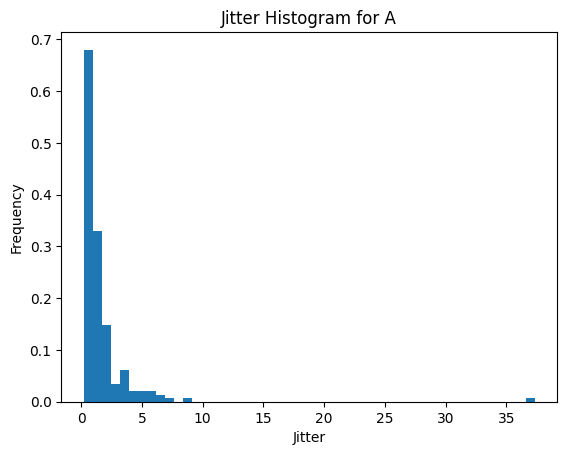

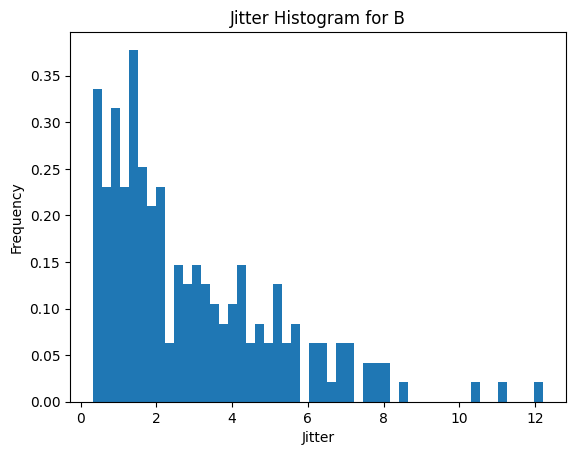

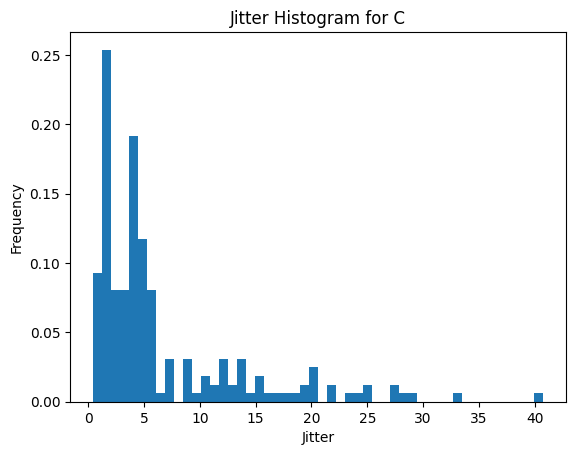

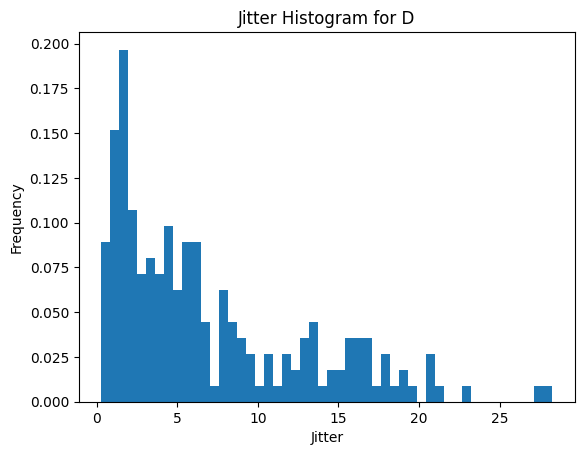

In [3]:
for name, jitter in jitter_ls:
	display_histogram(name, jitter)

In [4]:
# Compute the probability that |J| < T
def compute_analytical_joint_probability(machine_name, race_window_mu, race_window_std_dev, mu, std_dev):
    joint_mu = mu - race_window_mu
    joint_std_dev = math.sqrt(std_dev ** 2 + race_window_std_dev ** 2)
    norm_dist = norm(loc=joint_mu, scale=joint_std_dev)
    prob_success = norm_dist.cdf(0)
    
    print(f"Machine {machine_name}'s \tjoint mu: {joint_mu:.4f}, \tjoint std dev: {joint_std_dev:.4f}, \tq:\t {prob_success:.4f}")

### Compute Analytical Probability of Success, Trial 2.1
Assume both |J| and T are Normal RV

In [5]:
# Each machine's reported jitter stats (mu, sigma)
A_stats = (0.5977, 0.4719)
B_stats = (4.2528, 2.8669)
C_stats = (3.0997, 2.1162)
D_stats = (7.0973, 5.2346)

jitters_2_1 = [("A", A_stats), ("B", B_stats), ("C", C_stats), ("D", D_stats)]
for name, stats in jitters_2_1:
	compute_analytical_joint_probability(name, RACE_WINDOW_MU, RACE_WINDOW_SIGMA, stats[0], stats[1])

Machine A's 	joint mu: -0.9620, 	joint std dev: 1.4947, 	q:	 0.7401
Machine B's 	joint mu: 2.6931, 	joint std dev: 3.1985, 	q:	 0.1999
Machine C's 	joint mu: 1.5400, 	joint std dev: 2.5475, 	q:	 0.2728
Machine D's 	joint mu: 5.5376, 	joint std dev: 5.4233, 	q:	 0.1536


### Compute Analytical Probability of Success, Trial 2.2
Assume both |J| and T are Normal RV

In [6]:
# Compute the theoretical probability
for name, jitter in jitter_ls:
	mean = np.mean(jitter)
	std = np.std(jitter)
	compute_analytical_joint_probability(name, RACE_WINDOW_MU, RACE_WINDOW_SIGMA, mean, std)

Machine A's 	joint mu: 0.0984, 	joint std dev: 3.2068, 	q:	 0.4878
Machine B's 	joint mu: 1.3576, 	joint std dev: 2.6793, 	q:	 0.3062
Machine C's 	joint mu: 5.0550, 	joint std dev: 7.2441, 	q:	 0.2426
Machine D's 	joint mu: 5.3897, 	joint std dev: 6.1680, 	q:	 0.1911


### Compute Analytical Probability of Success, Attempt 2

Assume both |J| and T are Exponential RV.

In [7]:
def compute_theoretical_joint_probability_exp(machine_name, race_window_mu, mu):
	lambda_1 = 1 / mu
	lambda_2 = 1 / race_window_mu
	print(f"Machine {machine_name}'s lambda: {lambda_1:.4f} \tq: {(lambda_1 / (lambda_1 + lambda_2)):.4f}")

for name, jitter in jitter_ls:
	mean = np.mean(jitter)
	compute_theoretical_joint_probability_exp(name, RACE_WINDOW_MU, mean)

Machine A's lambda: 0.6031 	q: 0.4847
Machine B's lambda: 0.3428 	q: 0.3484
Machine C's lambda: 0.1512 	q: 0.1908
Machine D's lambda: 0.1439 	q: 0.1833
